In [1]:
# Load Dataset
import pandas as pd
train_dataset = pd.read_csv("../data/MNIST/train.csv")
test_dataset = pd.read_csv("../data/MNIST/test.csv")

In [2]:
# Check Train Set
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Check Test Set
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split to Image & Label
train_images = (train_dataset.iloc[:, 1:].values).astype("float32")
train_labels = train_dataset["label"].values
test_images = (test_dataset.values).astype("float32")

In [5]:
# Check Train Data's Image 
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Check Train Data's Label
train_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [7]:
# Check Test Data's Image
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
# Split into Train, Valid Dataset
from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, 
                                                                          train_labels, 
                                                                          stratify = train_labels, 
                                                                          random_state = 42, 
                                                                          test_size = 0.2)

In [9]:
# Check Train, Valid, Test Image's Shape
print("The Shape of Train Images: ", train_images.shape)
print("The Shape of Valid Images: ", valid_images.shape)
print("The Shape of Test Images: ", test_images.shape)

The Shape of Train Images:  (33600, 784)
The Shape of Valid Images:  (8400, 784)
The Shape of Test Images:  (28000, 784)


In [10]:
# Check Train, Valid Label's Shape
print("The Shape of Train Labels: ", train_labels.shape)
print("The Shape of Valid Labels: ", valid_labels.shape)

The Shape of Train Labels:  (33600,)
The Shape of Valid Labels:  (8400,)


In [11]:
# Reshape image's size to check for ours
train_images = train_images.reshape(train_images.shape[0], 28, 28)
valid_images = valid_images.reshape(valid_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

In [12]:
# Check Train, Valid, Test Image's Shape after reshape
print("The Shape of Train Images: ", train_images.shape)
print("The Shape of Valid Images: ", valid_images.shape)
print("The Shape of Test Images: ", test_images.shape)

The Shape of Train Images:  (33600, 28, 28)
The Shape of Valid Images:  (8400, 28, 28)
The Shape of Test Images:  (28000, 28, 28)


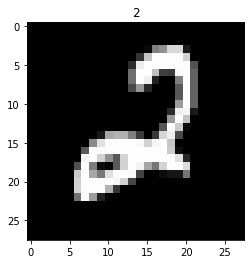

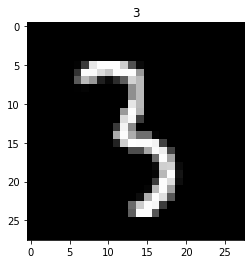

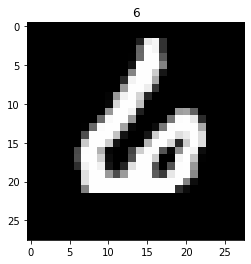

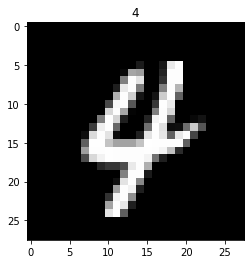

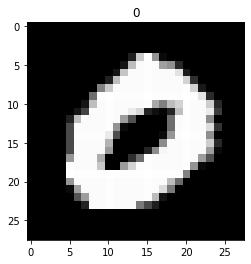

In [14]:
# Visualize Train, Valid, Test's Images
import matplotlib.pyplot as plt
for idx in range(0, 5):
    plt.imshow(train_images[idx], cmap = plt.get_cmap('gray'))
    plt.title(train_labels[idx])
    plt.show()

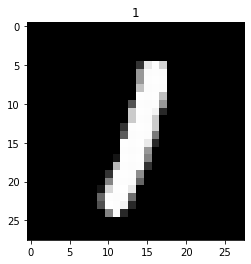

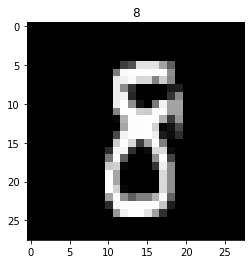

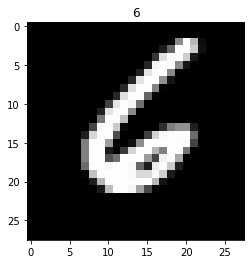

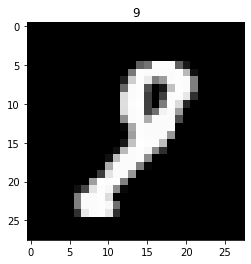

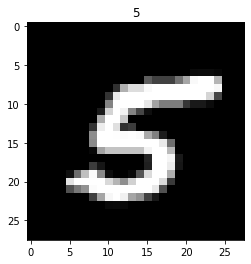

In [15]:
for idx in range(0, 5):
    plt.imshow(valid_images[idx], cmap = plt.get_cmap('gray'))
    plt.title(valid_labels[idx])
    plt.show()

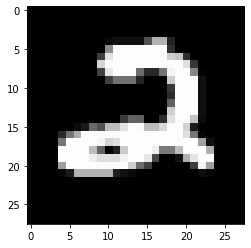

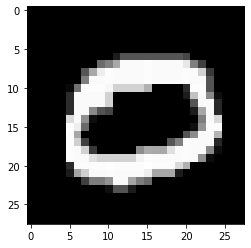

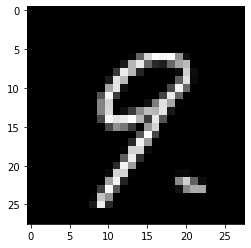

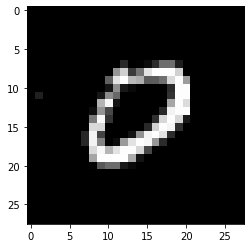

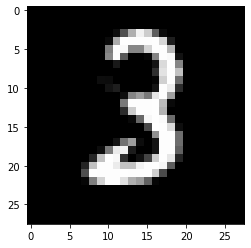

In [16]:
for idx in range(0, 5):
    plt.imshow(test_images[idx], cmap = plt.get_cmap('gray'))
    plt.show()

In [18]:
# Make Dataloader to feed on Multi Layer Perceptron Model
import torch
from torch.utils.data import TensorDataset, DataLoader
train_images_tensor = torch.tensor(train_images)
train_labels_tensor = torch.tensor(train_labels)
train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)
train_loader = DataLoader(train_tensor, batch_size = 64, num_workers = 0, shuffle = True)

valid_images_tensor = torch.tensor(valid_images)
valid_labels_tensor = torch.tensor(valid_labels)
valid_tensor = TensorDataset(valid_images_tensor, valid_labels_tensor)
valid_loader = DataLoader(valid_tensor, batch_size = 64, num_workers = 0, shuffle = True)

test_images_tensor = torch.tensor(test_images)

In [19]:
# Create Multi Layer Perceptron Model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(28 * 28, 128)
        self.hidden_layer = nn.Linear(128, 128)
        self.output_layer = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        x = F.log_softmax(x, dim = 1)
        return x

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = MLP().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.001)

print("Model: ", model)
print("Device: ", DEVICE)

Model:  MLP(
  (input_layer): Linear(in_features=784, out_features=128, bias=True)
  (hidden_layer): Linear(in_features=128, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)
Device:  cuda


In [20]:
# Definite Train & Evaluate
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

def evaluate(model, valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            valid_loss += F.cross_entropy(output, target, reduction = "sum").item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(target.view_as(prediction)).sum().item()

    valid_loss /= len(valid_loader.dataset)
    valid_accuracy = 100. * correct / len(valid_loader.dataset)
    return valid_loss, valid_accuracy

In [20]:
''' Training'''
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    valid_loss, valid_accuracy = evaluate(model, valid_loader)
    print("[EPOCH: {}], \tValidation Loss: {:.4f}, \tValidation Accuracy: {:.2f} %\n".format(epoch, valid_loss, valid_accuracy))

Train Epoch: 1 [0/33600 (0%)]	Loss: 8.973553
Train Epoch: 1 [6400/33600 (19%)]	Loss: 0.529814
Train Epoch: 1 [12800/33600 (38%)]	Loss: 0.314720
Train Epoch: 1 [19200/33600 (57%)]	Loss: 0.096157
Train Epoch: 1 [25600/33600 (76%)]	Loss: 0.055420
Train Epoch: 1 [32000/33600 (95%)]	Loss: 0.336188
[EPOCH: 1], 	Validation Loss: 0.1872, 	Validation Accuracy: 94.61 %

Train Epoch: 2 [0/33600 (0%)]	Loss: 0.206463
Train Epoch: 2 [6400/33600 (19%)]	Loss: 0.195046
Train Epoch: 2 [12800/33600 (38%)]	Loss: 0.116956
Train Epoch: 2 [19200/33600 (57%)]	Loss: 0.233528
Train Epoch: 2 [25600/33600 (76%)]	Loss: 0.109654
Train Epoch: 2 [32000/33600 (95%)]	Loss: 0.095079
[EPOCH: 2], 	Validation Loss: 0.1891, 	Validation Accuracy: 94.43 %

Train Epoch: 3 [0/33600 (0%)]	Loss: 0.047581
Train Epoch: 3 [6400/33600 (19%)]	Loss: 0.129415
Train Epoch: 3 [12800/33600 (38%)]	Loss: 0.182251
Train Epoch: 3 [19200/33600 (57%)]	Loss: 0.122384
Train Epoch: 3 [25600/33600 (76%)]	Loss: 0.135859
Train Epoch: 3 [32000/33600 (9

In [21]:
# Predict Test Dataset
def testset_prediction(model, test_images_tensor):
    model.eval()
    result = []
    with torch.no_grad():
        for data in test_images_tensor:
            data = data.to(DEVICE)
            output = model(data)
            prediction = output.max(1, keepdim = True)[1]
            result.append(prediction.tolist())
    return result

In [22]:
test_predict_result = testset_prediction(model, test_images_tensor)
test_predict_result[:5]

[[[2]], [[0]], [[9]], [[9]], [[3]]]

In [23]:
import numpy as np
from collections import Counter
Counter(np.squeeze(test_predict_result)).most_common()

[(1, 3203),
 (2, 2958),
 (7, 2887),
 (5, 2867),
 (3, 2842),
 (9, 2681),
 (4, 2671),
 (6, 2668),
 (0, 2654),
 (8, 2569)]

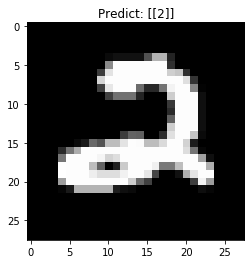

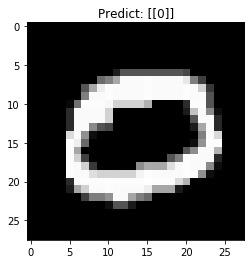

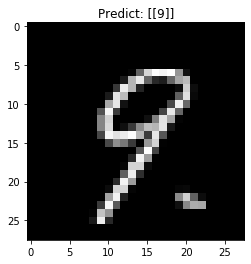

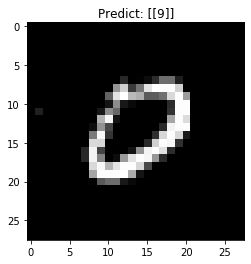

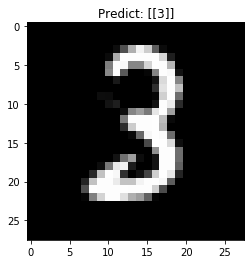

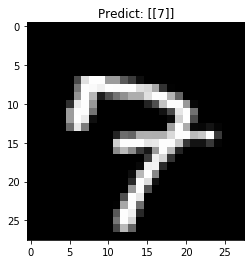

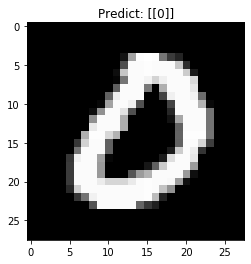

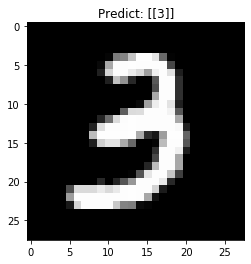

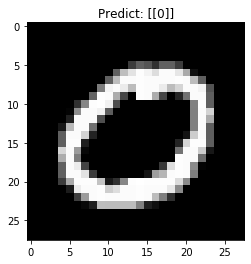

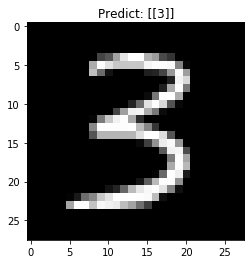

In [24]:
for idx in range(0, 10):
    plt.imshow(test_images[idx], cmap = plt.get_cmap('gray'))
    plt.title("Predict: " + str(test_predict_result[idx]))
    plt.show()